In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from cascid.configs import pad_ufes
from cascid import database
from cascid.image_preprocessing import adaptive_hair_removal

In [2]:
df = database.get_db()
df

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,NaN,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,...,4.0,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True


In [ ]:

N = 8
axList = []
fig = plt.figure(figsize=(12,24))
for i in range(N):
    image_path = str(pad_ufes.IMAGES_DIR / df.iloc[i]['img_id'])
    img = cv2.imread(image_path)
    hairless = adaptive_hair_removal(img)
    axList.append(fig.add_subplot(N,2,2*i+1))
    axList[2*i].imshow(img[:,:,::-1])
    axList.append(fig.add_subplot(N,2,2*i+2))
    axList[2*i+1].imshow(hairless[:,:,::-1])

axList[0].set_title("Original")
axList[1].set_title("Hairless");
# fig.show();

Testing process_and_save:
Original image path: /home/cedip/.cascid_data/PAD-UFES/images/PAT_1549_1882_230.png
Original image:


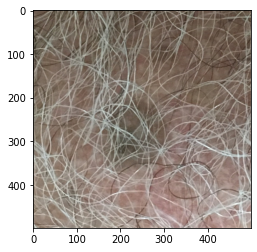

Target image path: /home/cedip/.cascid_data/PAD-UFES/images/hairless/PAT_1549_1882_230.png
Resulting image:


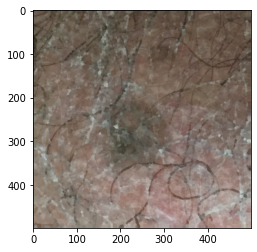

In [4]:
from typing import Callable
from pathlib import Path

def process_and_save(orig_path: str, target_path: str, transform: Callable, *, force_transform: bool= False) -> None:
    """
    Function to apply processing to images, and save results.
    Args:
    orig_path: str or Path-Like of iamge to be transformed
    target_path: Destination of transformed image
    transform: Callable that alters and returns modified image, callable is not expected to receive any arguments beside original image array
    Kwargs:
    force_transform: Must be keyworded, boolean, indicating whether to skip already present target_path images. Uses Path.exists() method to verify existence.
    """
    if not force_transform:
        if Path(target_path).exists():
            return
    img = cv2.imread(str(orig_path))
    processed = transform(img)
    cv2.imwrite(str(target_path), processed)

print("Testing process_and_save:")
orig = str(pad_ufes.IMAGES_DIR / df.iloc[5]['img_id'])
target = str(pad_ufes.HAIRLESS_DIR / df.iloc[5]['img_id'])
process_and_save(orig, target, adaptive_hair_removal)

print("Original image path:", orig)
print("Original image:")
img = cv2.imread(orig)
plt.imshow(img[:,:,::-1])
plt.show()

print("Target image path:", target)
print("Resulting image:")
img = cv2.imread(target)
plt.imshow(img[:,:,::-1])
plt.show()
